# Домашнее задание №5

## Задание 1

Подготовить тестовое изображение в градациях серого.

In [1]:
import cv2
import numpy as np
import skimage
import skimage.io
from matplotlib import pyplot as plt

src_image_url = 'https://drive.google.com/u/0/uc?id=1_dD96UYpPETfkZp5yM9cF8P6uFhai--Z&export=download'
src_image = skimage.io.imread(src_image_url)

gray_image = cv2.cvtColor(src_image, cv2.COLOR_RGB2GRAY)

## Задание 2

Получить изображение с выделенными контурами при помощи фильтров Превитта.

In [2]:
kernel_x = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
kernel_y = kernel_x.T
prewitt_image_x = cv2.filter2D(gray_image, -1, kernel_x)
prewitt_image_y = cv2.filter2D(gray_image, -1, kernel_y)

prewitt_image = prewitt_image_x + prewitt_image_y

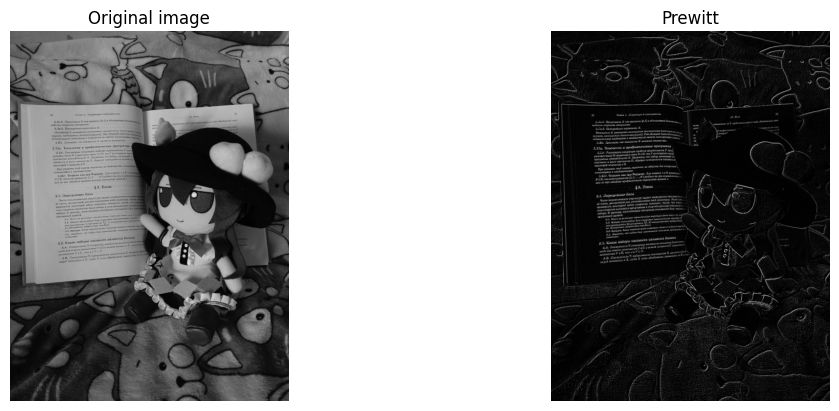

In [3]:
plt.figure(figsize=[6.4 * 2, 4.8])
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.axis("off")
plt.title("Original image")

plt.subplot(1, 2, 2)
plt.imshow(prewitt_image, cmap='gray')
plt.axis("off")
plt.title("Prewitt");

## Задание 3

Получить изображение с выделенными контурами при помощи фильтров Собеля.

In [4]:
sobel_image_x = cv2.Sobel(gray_image,cv2.CV_8U,1,0)
sobel_image_y = cv2.Sobel(gray_image,cv2.CV_8U,0,1)
sobel_image = sobel_image_x + sobel_image_y

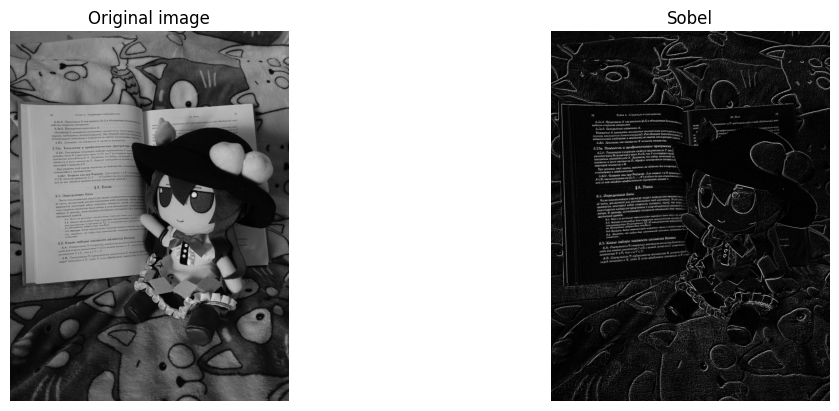

In [5]:
plt.figure(figsize=[6.4 * 2, 4.8])
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.axis("off")
plt.title("Original image")

plt.subplot(1, 2, 2)
plt.imshow(sobel_image, cmap='gray')
plt.axis("off")
plt.title("Sobel");

## Задание 4

Получить изображение с выделенными контурами при помощи метода Марра-Хилдрета с маской LoG 5х5.

In [6]:
ksize = 5
border = 3
sig = 1

def d(pair):
    return abs(pair[0] - pair[1])

def is_diff_sign(pair):
    return int(pair[0]) * int(pair[1]) < 0


gaussian_image_1 = (cv2.GaussianBlur(gray_image, (ksize, ksize), sig)).astype(np.int32)
gaussian_image_2 = (cv2.GaussianBlur(gray_image, (ksize, ksize), sig * 1.6)).astype(np.int32)
gaussian_image = gaussian_image_1 - gaussian_image_2

zero_crossing = np.zeros_like(gaussian_image)

for i in range(0, gaussian_image.shape[0]):
    i_left = 0 if i == 0 else i - 1
    i_right = gaussian_image.shape[0] - 1 if i == gaussian_image.shape[0] - 1 else i + 1
    for j in range(0, gaussian_image.shape[1]):
        j_left = 0 if j == 0 else j - 1
        j_right = gaussian_image.shape[1] - 1 if j == gaussian_image.shape[1] - 1 else j + 1
        
        a_pair = (gaussian_image[i][j_left], gaussian_image[i][j_right])
        b_pair = (gaussian_image[i_left][j], gaussian_image[i_right][j])
        c_pair = (gaussian_image[i_left][j_left], gaussian_image[i_right][j_right])
        d_pair = (gaussian_image[i_left][j_right], gaussian_image[i_right][j_left])
        
        if ( ((d(a_pair) > border) and is_diff_sign(a_pair)) or 
             ((d(b_pair) > border) and is_diff_sign(b_pair)) or 
             ((d(c_pair) > border) and is_diff_sign(c_pair)) or 
             ((d(d_pair) > border) and is_diff_sign(d_pair)) ):
            zero_crossing[i][j] = 100

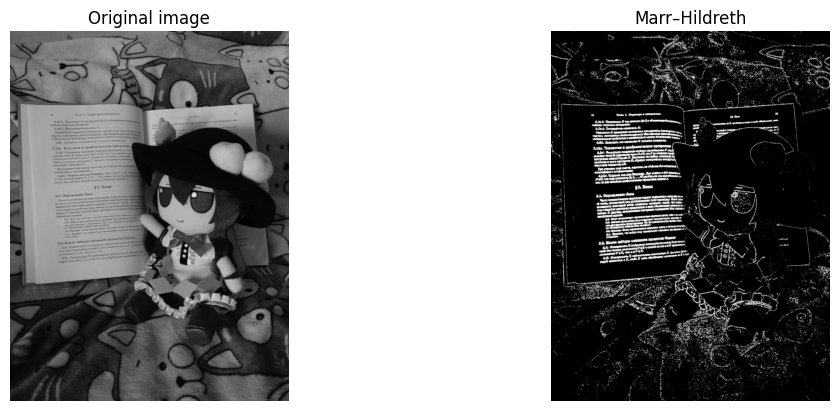

In [7]:
plt.figure(figsize=[6.4 * 2, 4.8])
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.axis("off")
plt.title("Original image")

plt.subplot(1, 2, 2)
plt.imshow(zero_crossing, cmap='gray')
plt.axis("off")
plt.title("Marr–Hildreth");

## Задание 5

Получить изображение с выделенными контурами при помощи метода Кэнни.

In [8]:
high_threshold = 255
canny_image = cv2.Canny(gray_image, high_threshold / 3, high_threshold)

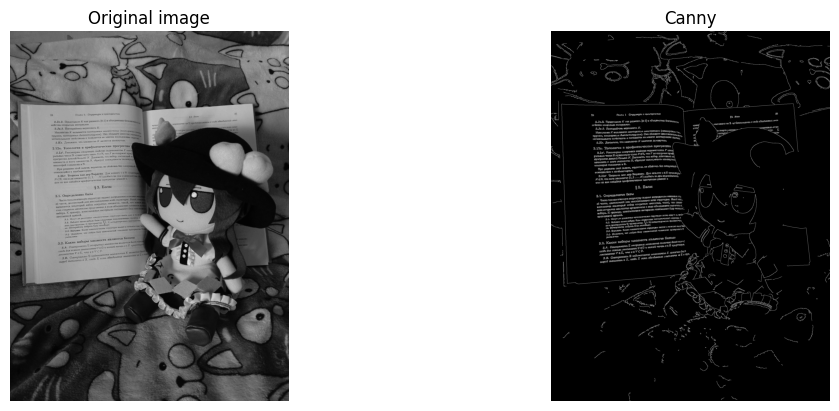

In [9]:
plt.figure(figsize=[6.4 * 2, 4.8])
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.axis("off")
plt.title("Original image")

plt.subplot(1, 2, 2)
plt.imshow(canny_image, cmap='gray')
plt.axis("off")
plt.title("Canny");

### Выполнил: Лежнин Максим Витальевич